In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('../input/electric-power-consumption-data-set/household_power_consumption.txt',
                    delimiter=';', parse_dates={'Datetime':['Date','Time']},
                    index_col=['Datetime'],infer_datetime_format=True, na_values=['nan','?'])
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
data.isna().sum()

In [ ]:
data.info()

In [4]:
for feature in data:
    data[str(feature)] = data[str(feature)].fillna(data[str(feature)].mean())

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Global_active_power')
plt.plot(data[:'2009'].iloc[:,1], color='darkblue')
plt.plot(data['2010':].iloc[:,1], color='red')

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


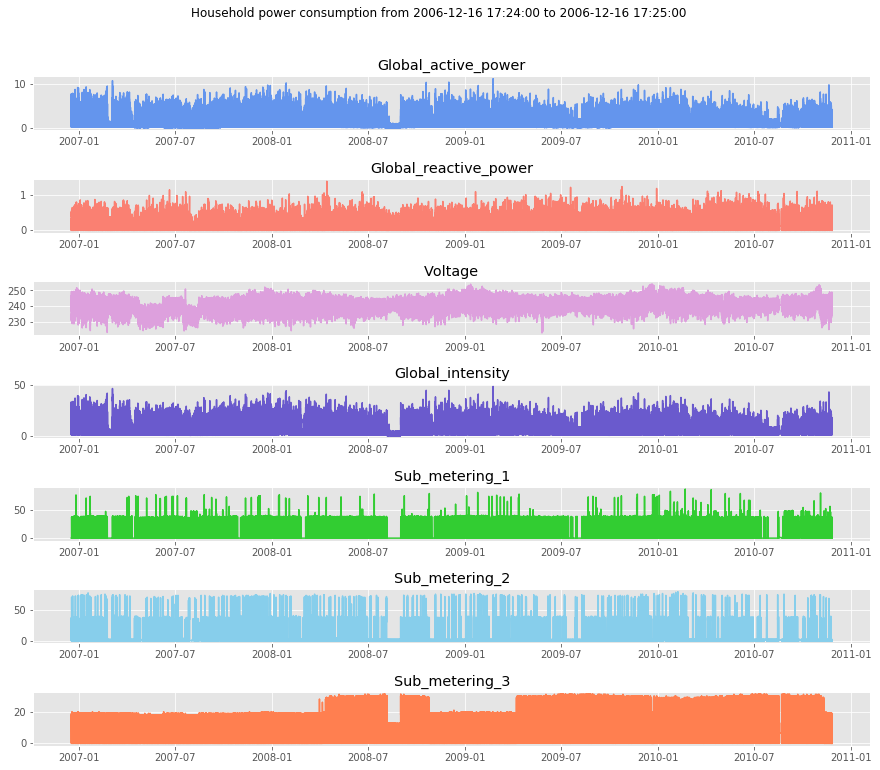

In [5]:
colors = ['cornflowerblue','salmon', 'plum','slateblue','limegreen','skyblue','coral']
plt.figure(figsize=(15,12))
plt.suptitle('Household power consumption from ' + str(data.index[0]) + ' to ' + str(data.index[1]))

# Iterate over each column
for feature in data:
    # Get index of the feature in the dataset 
    idx_col = data.columns.get_loc(str(feature))
    plt.subplot(data.shape[1],1,idx_col+1)
    plt.title(str(feature))
    plt.plot(data[str(feature)], color=colors[idx_col])
plt.subplots_adjust(top=0.9,hspace=0.9)


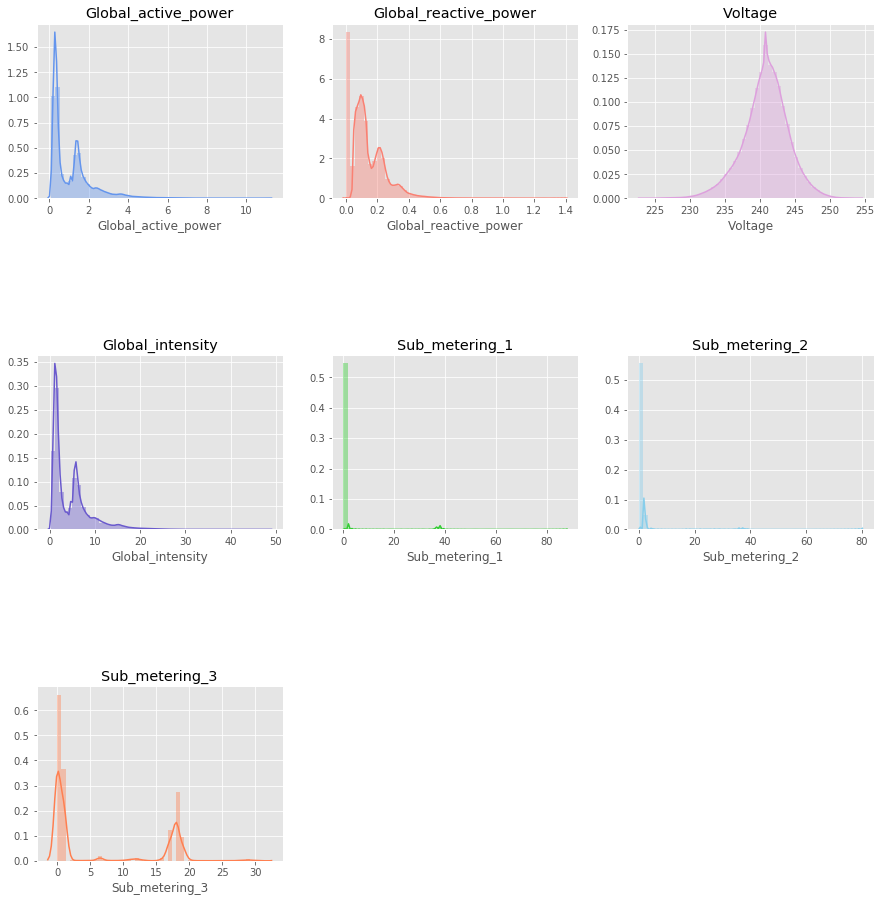

In [6]:
plt.figure(figsize=(15,15))
plt.title("Distribution of each feature")
for feature in data:
    # Get index of the feature in the dataset 
    idx_col = data.columns.get_loc(str(feature))
    plt.subplot(3,3,idx_col+1)
    plt.title(str(feature))
    sns.distplot(data[str(feature)], color=colors[idx_col])
plt.subplots_adjust(top=0.9,hspace=0.9)


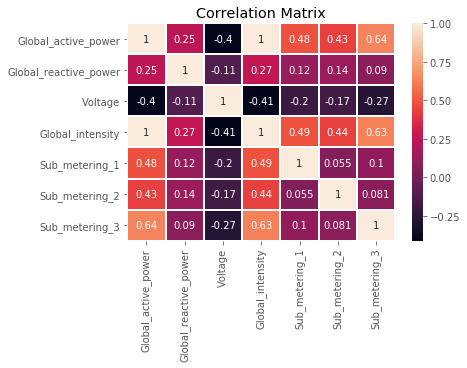

In [12]:
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True, linewidths=1)

In [15]:
# Create new df considering the mean for each hour
df_date = pd.DataFrame({'year': data.index.year,
                        'month': data.index.month,
                        'day': data.index.day,
                        'hour': data.index.hour})

df_date = pd.to_datetime(df_date)

new_df = data
new_df.index = df_date
new_df.head()

                     Global_active_power  Global_reactive_power  Voltage  \
2006-12-16 17:00:00                4.216                  0.418   234.84   
2006-12-16 17:00:00                5.360                  0.436   233.63   
2006-12-16 17:00:00                5.374                  0.498   233.29   
2006-12-16 17:00:00                5.388                  0.502   233.74   
2006-12-16 17:00:00                3.666                  0.528   235.68   
2006-12-16 17:00:00                3.520                  0.522   235.02   
2006-12-16 17:00:00                3.702                  0.520   235.09   
2006-12-16 17:00:00                3.700                  0.520   235.22   
2006-12-16 17:00:00                3.668                  0.510   233.99   
2006-12-16 17:00:00                3.662                  0.510   233.86   
2006-12-16 17:00:00                4.448                  0.498   232.86   
2006-12-16 17:00:00                5.412                  0.470   232.78   
2006-12-16 1

In [20]:
final_df = new_df.groupby(new_df.index).mean()

In [23]:
print("New data shape :", final_df.shape)
final_df.head()

New data shape : (34589, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [24]:
def preprocess_data(X,sequence):
    X_seq = []
    y = []
    
    for i in range(sequence,X.shape[0]):
        X_seq.append(X.iloc[i-sequence:i,:].values)
        y.append(X.iloc[i,0])
        
    X_seq = np.array(X_seq)
    y = np.array(y)
    
    print(X_seq.shape)
    print(y.shape)
    
    return X_seq, y


In [34]:
for feature in final_df:
    scaler = MinMaxScaler()
    final_df[str(feature)] = scaler.fit_transform(final_df[str(feature)].values.reshape(-1,1))

In [35]:
X = final_df.iloc[:,:]

In [36]:
train_data = X[:'2009']
test_data = X['2010':]

In [37]:
X_train, y_train = preprocess_data(train_data,72)
X_test, y_test = preprocess_data(test_data,72)

(26599, 72, 7)
(26599,)
(7846, 72, 7)
(7846,)


In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(10, input_shape=(X_train.shape[1], X_train.shape[2]),
               activation='tanh',return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(10, activation='tanh',return_sequences=False))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
26599/26599 [==============================] - 253s 10ms/step - loss: 0.0149
Epoch 2/10
26599/26599 [==============================] - 253s 10ms/step - loss: 0.0107
Epoch 3/10
 6112/26599 [=====>........................] - ETA: 3:09 - loss: 0.0102

KeyboardInterrupt: 